<a href="https://colab.research.google.com/github/zimzion/EYTIP/blob/master/class_0N_Convex_of_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import random as r

In [0]:
misclass_ratio = 0.4
n_points = 100
n_misclass = int(misclass_ratio*n_points)
split_line = (0.5, 1)
colors = ['r', 'b']

x_rnd = [r.random()*r.choice([1, -1]) for _ in range(n_points)]
y_rnd = [r.random()*r.choice([1, -1]) for _ in range(n_points)]
dots = [split_line[0]*x + split_line[1]*y for x, y in zip(x_rnd, y_rnd)]
cate = [1 if dot >= 0.0 else 0 for dot in dots]
cate_change = [(i+1)%2 for i in cate[:n_misclass]]
cate[:n_misclass] = cate_change
dot_colors = [colors[i] for i in cate]

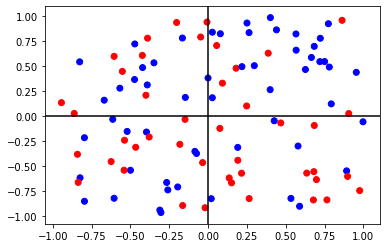

In [108]:
fig, ax = plt.subplots()
ax.scatter(x_rnd, y_rnd, color=dot_colors)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
plt.show()

In [0]:
import numpy as np
from mpl_toolkits import mplot3d

In [0]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

X = np.reshape(X, -1)
Y = np.reshape(Y, -1)
Z = np.reshape(Z, -1)

Text(0.5, 0, 'z')

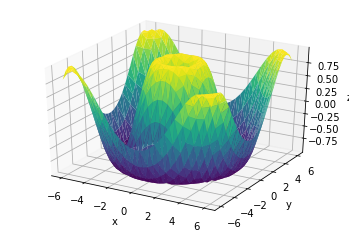

In [111]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='viridis')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                cmap='viridis', edgecolor='none')
ax.plot_trisurf(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [0]:
import math
import numpy as np

def predict(w0, w1, x, y):
  exp_part = [math.exp(-1*(w0*vx + w1*vy)) for vx, vy in zip(x, y)]
  catehat = [round(1.0/(1.0 + v)) for v in exp_part]
  #calc = [w0*vx + w1*vy for vx, vy in zip(x, y)]
  #catehat = [1.0 if v >= 0.0 else 0.0 for v in calc]
  return catehat

In [0]:
def calc_rmse(w0, w1):
  rmse_list = list()
  for row0, row1 in zip(w0, w1):
    rmse_row = list()
    for e0, e1 in zip(row0, row1):
      catehat = predict(e0, e1, x_rnd, y_rnd)
      rmse = math.sqrt(sum([(v - vhat)**2 for v, vhat in zip(cate, catehat)]) / n_points)
      rmse_row.append(rmse)
    rmse_list.append(rmse_row)

  rmse_array = np.array(rmse_list)
  return rmse_array

In [0]:
w0 = np.linspace(-1, 1, 100)
w1 = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(w0, w1)
RMSE = calc_rmse(X, Y)


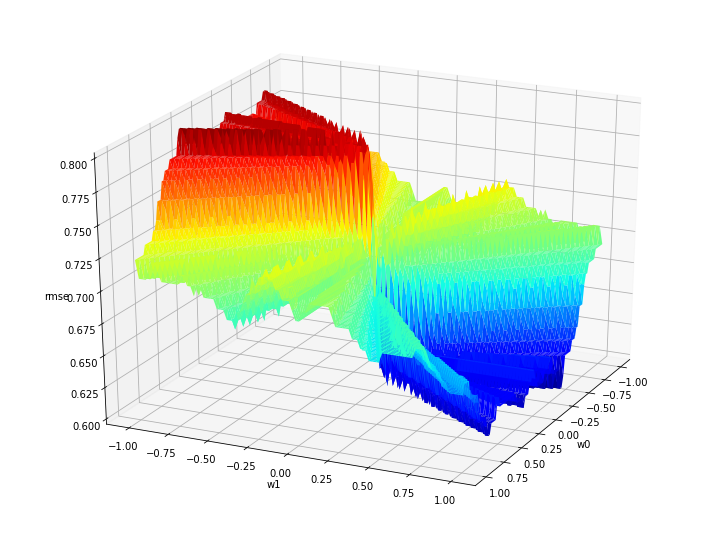

In [115]:
plt.rcParams["figure.figsize"] = 12.8, 9.6
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, RMSE, 50, cmap='binary')
ax.plot_surface(X, Y, RMSE, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.view_init(25, 25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('rmse')
plt.show()

In [116]:
min_by_row = [(np.argmin(row), row[np.argmin(row)]) for row in RMSE]
min_values = [v for _, v in min_by_row]
min_col = np.argmin(min_values)
min_row = min_by_row[min_col][0]
opt_w0 = w0[min_row]
opt_w1 = w1[min_col]
print(f'w0 : {opt_w0}, w1 : {opt_w1}')

w0 : -0.030303030303030276, w1 : 0.07070707070707072


In [117]:
opt_line = lambda x : -opt_w0/opt_w1*x
a = (-1, opt_line(-1))
b = (1, opt_line(1))

print(f'a : {a}, b : {b}')

a : (-1, -0.4285714285714281), b : (1, 0.4285714285714281)


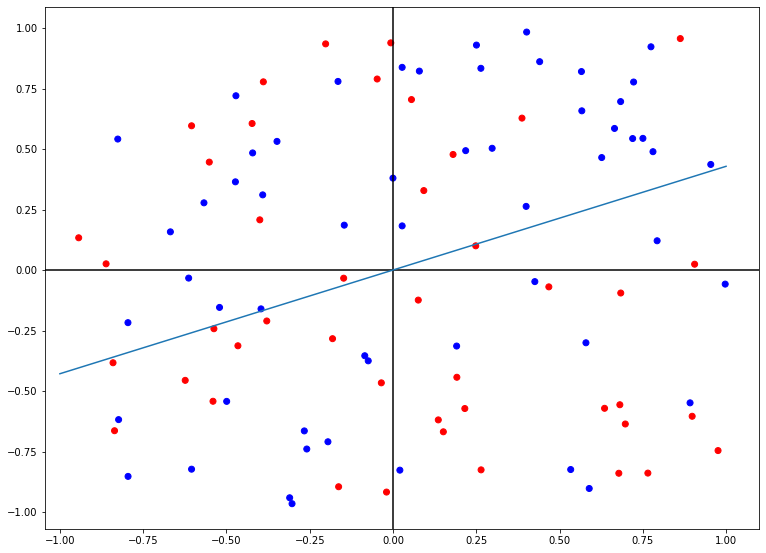

In [118]:
import matplotlib.lines as mlines
l = mlines.Line2D([a[0],b[0]], [a[1],b[1]])
fig, ax = plt.subplots()
ax.scatter(x_rnd, y_rnd, color=dot_colors)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.add_line(l)
plt.show()